# DART에서 기업정보 가져와 기업분석 실습

In [ ]:
import dart_fss as dart
import pandas as pd

api_key=''
dart.set_api_key(api_key=api_key)

In [ ]:
# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

In [ ]:
df_temp=pd.DataFrame() # 빈 데이터프레임 생성
paper=corp_list.find_by_sector(sector='생활용품')
for a in paper:
    dict_temp=a.to_dict()
    df_temp2=pd.DataFrame.from_dict(dict_temp, orient='index').T 
    
    df_temp=pd.concat([df_temp, df_temp2])

In [ ]:
# 밀리의 서재 기업 개황 정보 가져오기
millie = corp_list.find_by_corp_name('밀리의서재', exactly=True)[0]

In [ ]:
edu_list=corp_list.find_by_corp_name('밀리의서재')
find_list=[]

for e in edu_list:
    find_list.append([e.corp_name, e.corp_code])
    #e -> edu_list의 각 요소 가리킴
    
edu_df=pd.DataFrame()    
    
for e in find_list:
    e_num=e[1] # e 리스트의 두 번째 요소를 e_num에 할당 = corp_code
    
    temp=dart.api.filings.get_corp_info(e_num) # e_num에 해당하는 기업의 정보를 가져와 temp에 할당
    edu_temp=pd.DataFrame.from_dict(temp, orient='index').T # 딕셔너리 데이터 프레임으로 변환
    edu_df=pd.concat([edu_df, edu_temp])

In [ ]:
# # 특정 회사 코드를 사용하여 기업 정보를 검색
wg = corp_list.find_by_corp_code('')
# '2023년 8월 1일' 이후의 보고서를 검색하며, 상세 유형 조건에 따른 공시 정보를 가져옵니다.
reports = wg.search_filings(bgn_de='20230801', pblntf_detail_ty='')
# 검색된 보고서 중에서 첫 번째 보고서를 선택
report = reports[0]
# 선택된 보고서의 XBRL 데이터를 가져옵니다.
xbrl = report.xbrl

#### 기업의 분석 보고서는 매출액, 영업이익, 당기순이익을 중심으로 한 시각화를 주로 하여 이루어짐.

In [143]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.set(font_scale=1.4)
# 맑은 고딕으로 글꼴 설정하기
plt.rc('font', family='Malgun Gothic') 
# 마이너스 기호 문제 해결하기
mpl.rcParams['axes.unicode_minus'] = False

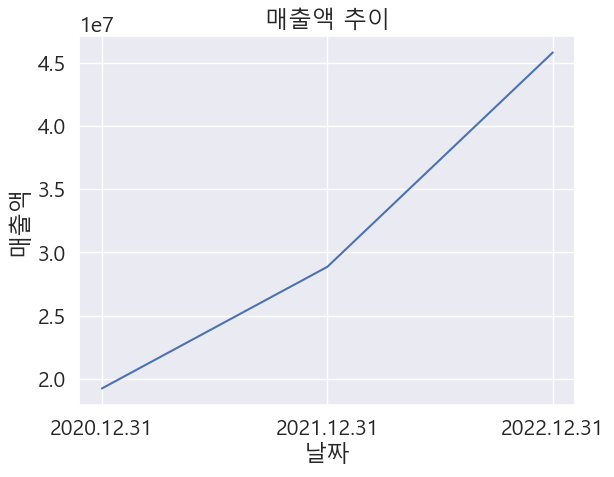

In [157]:
# 그래프 그리기
sns.lineplot(data=분석, x='날짜', y='매출액')
plt.title('매출액 추이')
plt.show()

Text(0.5, 1.0, '영업이익 추이')

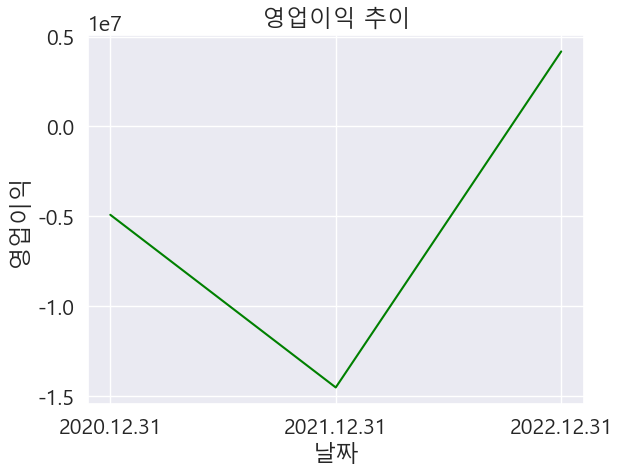

In [159]:
# 그래프 그리기
ax=sns.lineplot(data=분석, x='날짜', y='영업이익', color='green')
plt.title('영업이익 추이')

## 보고서 추가 보완 자료 - 학교급별 전자책/종이책 독서시간 비율
#### 출처: 통계청

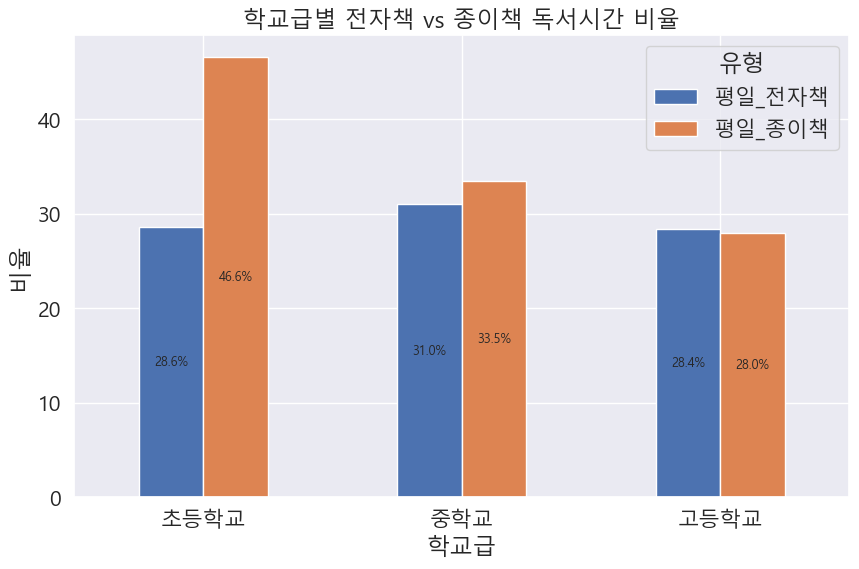

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 데이터
data = {
    '학교급': ['초등학교', '중학교', '고등학교'],
    '평일_전자책': [28.6, 31, 28.4],
    '평일_종이책': [46.6, 33.5, 28]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 학교급을 인덱스로 설정
df.set_index('학교급', inplace=True)

# 막대 그래프 그리기
ax = df.plot(kind='bar', figsize=(10, 6))

# 그래프 꾸미기
plt.title('학교급별 전자책 vs 종이책 독서시간 비율')
plt.xlabel('학교급')
plt.ylabel('비율')
plt.xticks(rotation=0)
plt.legend(title='유형')

# 각 막대에 값을 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=9)

plt.show()